# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [kpc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [18]:
import numpy as np

# Carga los datos a un ndarray

archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat'
datos = np.loadtxt(archivo)

# Inspecciona su forma y tamaño

print ('\nForma matriz de datos:\n' + str(datos.shape))
print ('\nTamaño matriz de datos:\n' + str(datos.size))

for i in [0, 1, 2, 3, 4, 5, 6]:
  print ('\nForma columna ' + str(i) + ':\n' + str(datos[0:5299, i].shape))
  print ('\nTamaño columna ' + str(i) + ':\n' + str(datos[0:5299, i].size))


Forma matriz de datos:
(5298, 7)

Tamaño matriz de datos:
37086

Forma columna 0:
(5298,)

Tamaño columna 0:
5298

Forma columna 1:
(5298,)

Tamaño columna 1:
5298

Forma columna 2:
(5298,)

Tamaño columna 2:
5298

Forma columna 3:
(5298,)

Tamaño columna 3:
5298

Forma columna 4:
(5298,)

Tamaño columna 4:
5298

Forma columna 5:
(5298,)

Tamaño columna 5:
5298

Forma columna 6:
(5298,)

Tamaño columna 6:
5298


## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

Text(0.5,1,'Histograma de distancias')

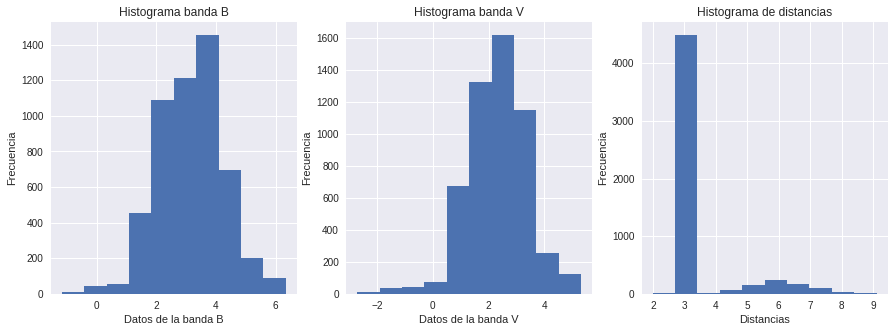

In [28]:
#Plotear histogramas de cada columna

import matplotlib.pyplot as plt
%matplotlib inline

columnaB = datos[0:5299, 0]
columnaV = datos[0:5299, 1]
columnaD = datos[0:5299,6]

fig, ax = plt.subplots(figsize = (15,5), ncols = 3)

ax[0].hist(columnaB)
ax[0].set_xlabel('Datos de la banda B')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Histograma banda B')


ax[1].hist(columnaV)
ax[1].set_xlabel('Datos de la banda V')
ax[1].set_ylabel('Frecuencia')
ax[1].set_title('Histograma banda V')

ax[2].hist(columnaD)
ax[2].set_xlabel('Distancias')
ax[2].set_ylabel('Frecuencia')
ax[2].set_title('Histograma de distancias')

## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [32]:
#Filtrar por distancia

datos_filtrados = datos.copy()[columnaD <= 3]


print('El set original contenía ' + str(datos.size) + ' estrellas, luego de filtrar quedaron ' + str(datos_filtrados.size) + '.')

El set original contenía 37086 estrellas, luego de filtrar quedaron 16275.


## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [0]:
#Funcion mag_abs(mag, dist)

def mag_abs(mag_ap, dist):
    
    
    return 

## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

In [0]:
#Crear arrays MV y color


#plot cmd


## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

In [0]:
# plot cmd + masa / smd + temp

In [0]:
# plot cmd hist2D